# Lytx Coding Test

Completetion of the coding test. I wasn't thinking clearly during the test and missed some obvious things. Here are problems 2 and 3 in better form.

## Problem 2
Remove vowels/consonants from a word

Space = O(n) -- n = length of word

Speed = O(n * m) -- n = length of word, m = size of vowels

In [1]:
word = "HackerRank"
vowels = ['a','e','i','o','u']

# remove vowels
print("Remove vowels: ",[letter for letter in word.lower() if letter not in vowels])
# remove consonants
print("Remove consonants: ",[letter for letter in word.lower() if letter in vowels])

Remove vowels:  ['h', 'c', 'k', 'r', 'r', 'n', 'k']
Remove consonants:  ['a', 'e', 'a']


## Problem 3 
Optimize a threshold for a target precesion

In [2]:
# import data
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("test.csv")

In [3]:
# scoring function
def evaluation(trues, preds):
  true_pos = sum(1 for true,pred in zip(trues, preds) if true==1 and pred==1)
  false_pos = sum(1 for true,pred in zip(trues, preds) if true==1 and pred==0)
  false_neg = sum(1 for true,pred in zip(trues, preds) if true==0 and pred==1)
  precesion = true_pos / (true_pos + false_pos)
  recall = true_pos / (true_pos + false_neg)
  return recall, precesion

In [4]:
# recursive optimzation function
def optimize_precesion(data, thresh, target, i):

    # make preds with thresh
    predictions = []
    for row in data.values:
        value = row[0]
        label = row[1]
        predictions.append(1) if value > thresh else predictions.append(0)

    # calc the scores
    data['prediction'] = predictions
    recall, precesion = evaluation(list(data.label), list(data.prediction))
    scores.append([thresh, precesion, recall])

    # recursive search
    if i == iters:
        return scores
    if precesion > target_precision:
        optimize_precesion(data, thresh + .0125, target, i + 1)
    elif precesion < target_precision:
        optimize_precesion(data, thresh - .0125, target, i + 1)

In [5]:
# set vars and compute
scores = []
iters = 50
initial_thresh_guess = .5
target_precision = 0.9
optimize_precesion(data, initial_thresh_guess, target_precision, 0)

From plotting the optimization search we see that for this example dataset reaches a local maximum around iteration 40. Precession jumps b/w 1 and .66 and does not reach any closer to .9. 

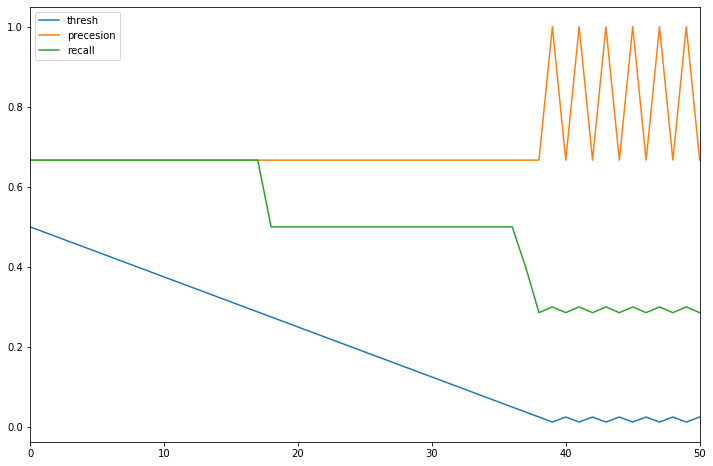

In [6]:
# plots
df = pd.DataFrame(scores)
df.columns = ['thresh', 'precesion', 'recall']
df.plot(figsize=(12,8))